## Chi Square test Examples

Using the gender and drunk drive table

| Gender  |Drunk Yes|Drunk No|Total|
|---|---|---|---|
| Male  |  77 | 404  | 481  | 
|  Female | 16  | 122  | 138  |
|  Total | 93  |  526 |  619 |

Male drunk driver = 77/481 = 16%, female drunk driver = 16/138 = 11.6%. Is it true that male drivers are more likely to be a drunk driver?

## Hypothesis test
* Is there a difference between gender and driving drunk?
* This is categorical data to categorical data, cannot do ANOVA test
* Steps
    * if no correlation, or if gender and driving drunk is independent, what do we expect?
        * $p(male & drunk) = p(male) * p(drunk) = 481/619 * 93/619$
        * total male and drunk should be 619 * $p(male & drunk)$ = 72.3
    * chi square is to sum difference between observed & expected counts
        * $\chi^2 = \sum{\frac{(observ - expect)^2}{expec}}$
        * for 2x2 case, $\chi^2$ > 3.84 is considered large
        * for others, use p value p=0.201
        
* Post Hoc-Bonferroni method: adjustment of p to protect Type I error or accumulated error
    * adjust p= p/c, where c is the number of comparisons
    * if total 5 condition, 2 pair compaision = 5C2 = 5*4/2 = 10
    * adjust p = 0.05 / 10 = 0.005

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv('data/nesarc.csv', low_memory=False)

In [3]:
# MORE THAN ONCE RIDE IN VEHICLE WHILE DRIVER WAS DRINKING -S2BQ1A22, 1=yes, 2=No
# ETHRACE2A: 1=white, 2= Black, 3=American Indian, 4=Asian, 5=Hispanic or Latino

data['S2BQ1A22'] = pd.to_numeric(data['S2BQ1A22'], errors='coerce')
data['ETHRACE2A'] = pd.to_numeric(data['ETHRACE2A'], errors='coerce')

sub1 = data.copy()
sub1['S2BQ1A22'] = sub1['S2BQ1A22'].replace(9, np.nan)

sub2 = sub1[['S2BQ1A22', 'ETHRACE2A']].dropna()
ct1 = pd.crosstab(sub2['S2BQ1A22'], sub2['ETHRACE2A'])
colsum = ct1.sum(axis=0)
colpct = ct1 / colsum
print(ct1)
print(colpct)

ETHRACE2A      1     2    3    4     5
S2BQ1A22                              
1.0         7130  1529  257  121  1483
2.0        13721  4590  320  701  4587
ETHRACE2A        1         2         3         4         5
S2BQ1A22                                                  
1.0        0.34195  0.249877  0.445407  0.147202  0.244316
2.0        0.65805  0.750123  0.554593  0.852798  0.755684


The observed counts and ratios can be found in the following figure. As shown in the ratio figure, ethnic group 4 is most unlikely to ride when the drive was drinking (14.7%), while ethnic group 3 is mostl likely to ride when the driver was drinking (44.5). Running the the chi2 test we found x2 to be 477.2 and the p value to be 5.6E-102. Clearly there is a relation between the riding in vhicle while driver was drinking and the ethnic groups.

In [4]:
ct1_x2 = st.chi2_contingency(ct1)
print(ct1_x2)

(477.23544699584426, 5.612525644138293e-102, 4, array([[ 6369.30572897,  1869.15647957,   176.25482738,   251.09439879,
         1854.18856529],
       [14481.69427103,  4249.84352043,   400.74517262,   570.90560121,
         4215.81143471]]))


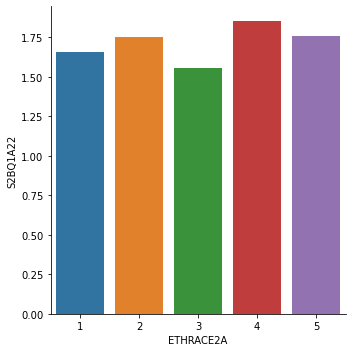

In [5]:
sn.catplot(x="ETHRACE2A", y="S2BQ1A22", data=sub2, kind="bar", ci=None)

In [6]:
pairs = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
for pair in pairs:
    df = sub2[sub2.ETHRACE2A.isin(pair)]
    ct = pd.crosstab(df['S2BQ1A22'], df['ETHRACE2A'])
    colsum = df.sum(axis=0)
    colpct = df / colsum
    ct_x2 = st.chi2_contingency(ct)
    print("Pair={}, chi2={:.2f}, p={:.2E}".format(pair, *ct_x2[:2]))

Pair=(1, 2), chi2=183.56, p=8.11E-42
Pair=(1, 3), chi2=26.15, p=3.16E-07
Pair=(1, 4), chi2=133.85, p=5.89E-31
Pair=(1, 5), chi2=205.52, p=1.30E-46
Pair=(2, 3), chi2=102.07, p=5.35E-24
Pair=(2, 4), chi2=41.59, p=1.12E-10
Pair=(2, 5), chi2=0.48, p=4.90E-01
Pair=(3, 4), chi2=151.38, p=8.65E-35
Pair=(3, 5), chi2=109.22, p=1.45E-25
Pair=(4, 5), chi2=37.69, p=8.27E-10


Since there are 5 ethnic groups, there are a total of 10 possible pairs which might show the dependence. We did the post hoc test to figure out which two groups have the dependence. Here number of runs is 10, and the adjust p value is 0.05/10=0.005.

As shown in the following output, the paris (2, 5) have p value > 0.005, which indicates there are no correlations  between riding in vehicle while the driver was drinking and the ethnic groups. All the other pairs have p value much less the adjust p value threshold 0.005, indicating that people from those groups have different tedency of riding in a vehicle when the driver is drunk. 

